# Making a SOSS trace with pandeia
Just for comparison and posterity, here is how the ETC generates the SOSS trace

In [24]:
from pandeia.engine.calc_utils import build_default_calc
from pandeia.engine.perform_calculation import perform_calculation
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
%matplotlib notebook

In [2]:
c = build_default_calc(telescope='jwst', instrument='niriss', mode='soss')

In [3]:
c

{'background': 'medium',
 'calculation': {'effects': {'background': True,
   'ipc': True,
   'saturation': True},
  'noise': {'crs': True,
   'darkcurrent': True,
   'ffnoise': True,
   'readnoise': True,
   'rn_correlation': True}},
 'configuration': {'detector': {'nexp': 1,
   'ngroup': 10,
   'nint': 1,
   'readmode': 'nisrapid',
   'subarray': 'substrip256'},
  'dynamic_scene': False,
  'instrument': {'aperture': 'soss',
   'disperser': 'gr700xd',
   'filter': None,
   'instrument': 'niriss',
   'mode': 'soss'},
  'max_scene_size': 16.9,
  'scene_size': 16.9},
 'scene': [{'position': {'orientation': 0.0,
    'position_parameters': ['x_offset', 'y_offset', 'orientation'],
    'x_offset': 0.0,
    'y_offset': 0.0},
   'shape': {'geometry': 'point', 'shape_parameters': []},
   'spectrum': {'extinction': {'bandpass': 'v',
     'law': 'mw_rv_31',
     'unit': 'mag',
     'value': 0.0},
    'lines': [],
    'name': 'generic source',
    'normalization': {'norm_flux': 0.001,
     'norm_fl

In [4]:
r = perform_calculation(c)

/Users/jfilippazzo/miniconda3/envs/astroconda/lib/python3.5/site-packages/pandeia/engine/report.py:159: RuntimeWarning: invalid value encountered in true_divide
  sn = extracted['extracted_flux'] / extracted['extracted_noise']


In [6]:
r.keys()

dict_keys(['3d', 'warnings', 'input', 'sub_reports', 'information', 'scalar', 'transform', '1d', '2d'])

In [27]:
r['2d'].keys()

dict_keys(['saturation', 'snr', 'snr_unrotated', 'detector_unrotated', 'saturation_unrotated', 'detector'])

<IPython.core.display.Javascript object>


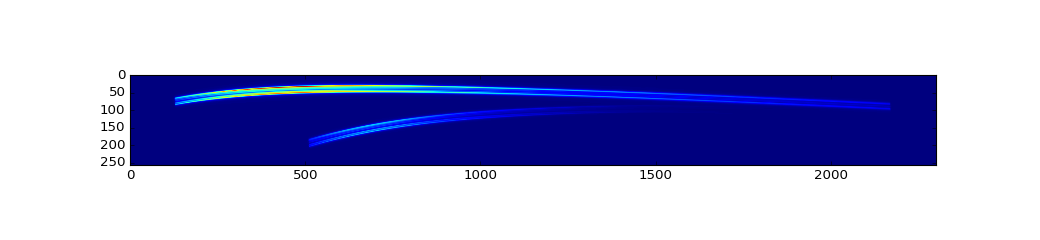

In [33]:
plt.figure(figsize=(13,3))
plt.imshow(r['2d']['snr'])

<IPython.core.display.Javascript object>


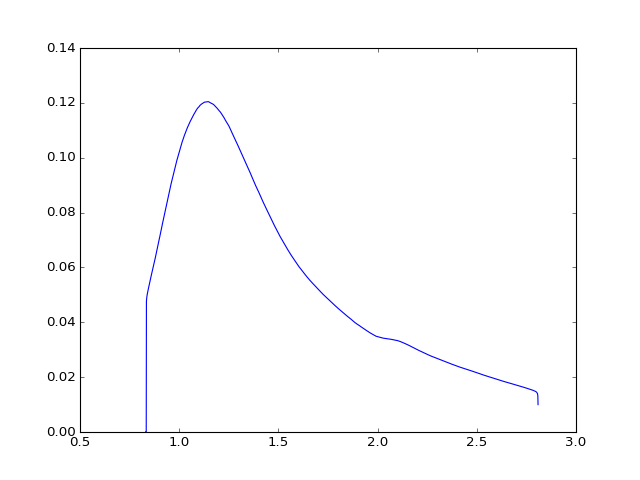

dict_keys(['extracted_flux', 'sn', 'target', 'fp', 'extracted_bg_only', 'extracted_noise', 'wave_calc', 'extracted_bg_total', 'bg_rate', 'bg', 'wave_pix', 'n_full_saturated', 'extracted_flux_plus_bg', 'extracted_contamination', 'total_flux', 'n_partial_saturated'])

In [23]:
plt.figure()
plt.plot(*r['1d']['extracted_flux'])
r['1d'].keys()